## 1D SoftMax Classifier

In [26]:
# import the libraries that we need 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [40]:
# Class for plotting

def plot_data(data_set, model=None, n = 1,color =False ):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [41]:
torch.manual_seed(0)

`Make the Dataset`

In [28]:
class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

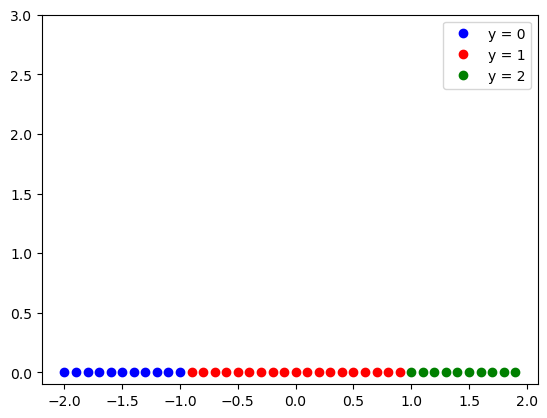

In [29]:
# Create the dataset object and plot the dataset object

data_set = Data()
data_set.x
plot_data(data_set)

In [43]:
# Softmax classifier befor training 

model = nn.Sequential(nn.Linear(1,3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0198],
                      [ 0.7929],
                      [-0.0887]])),
             ('0.bias', tensor([ 0.2646, -0.3022, -0.1966]))])

In [44]:
# Create criterion function, optimizer, and dataloader

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
trainloader = DataLoader(dataset = data_set, batch_size = 5)

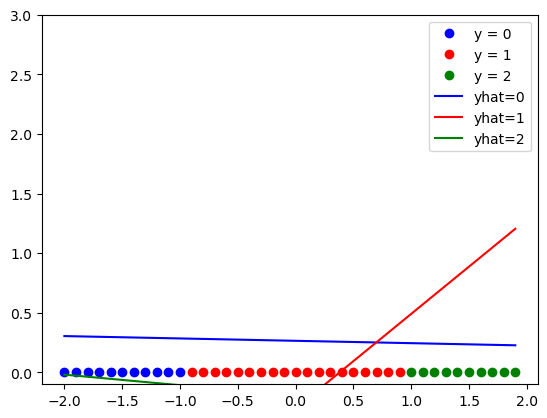

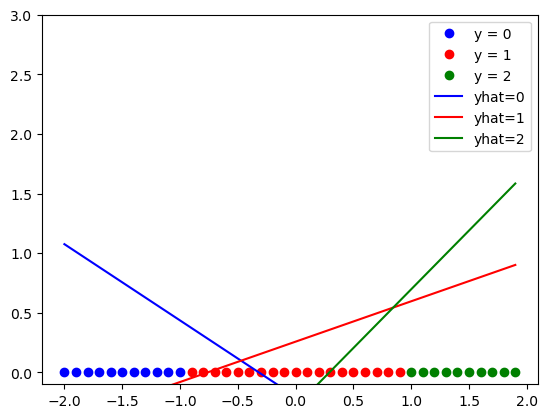

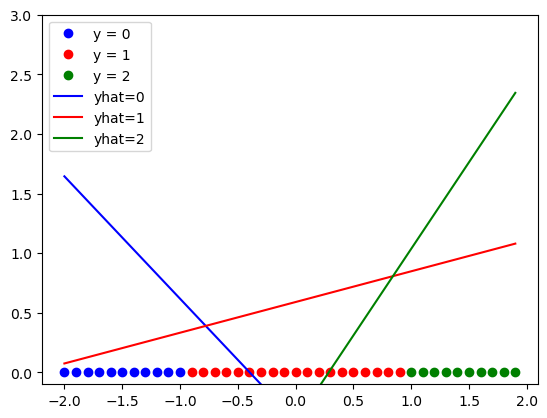

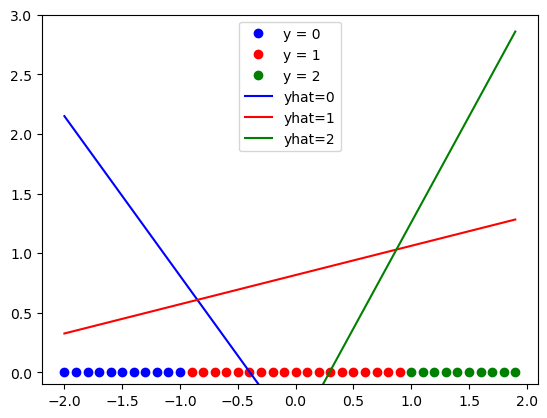

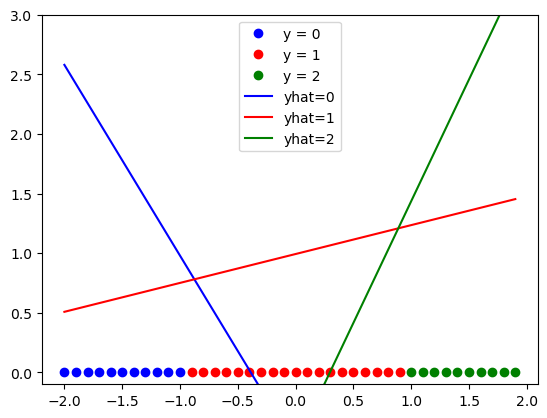

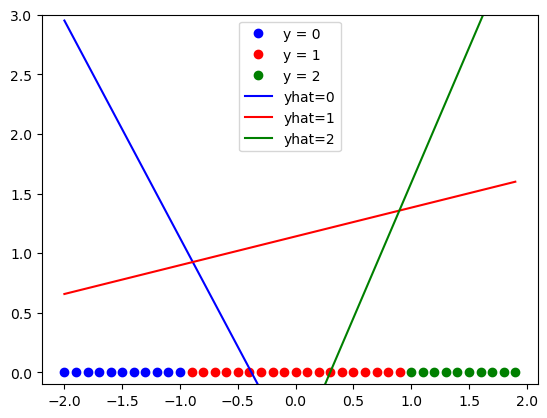

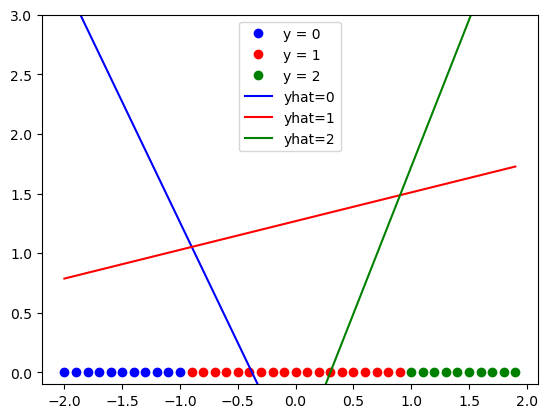

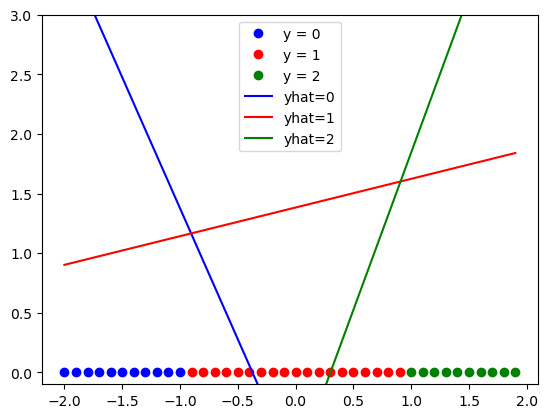

In [45]:
# Train the model

LOSS = []
def train_model(epochs):
    for epoch in range(epochs):
        if epoch %50 == 0:
            pass
            plot_data(data_set=data_set,model=model)
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat,y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()
train_model(400)

In [46]:
# Make the prediction

z =  model(data_set.x)
_, yhat = z.max(1)
print("The prediction:", yhat)

The prediction: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [47]:
# Print the accuracy

correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print("The accuracy: ", accuracy)

The accuracy:  1.0


## 2D SoftMax Classifier

`Load Data`

In [14]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [7]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

`Creat Model`

In [15]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [16]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [9]:
class SoftMax(nn.Module):
    def __init__(self, in_size, out_size):
        super(SoftMax,self).__init__()
        self.linear = nn.Linear(in_size,out_size)

    def forward(self,x):
        out = self.linear(x)
        return out

In [10]:
input_dim = 28*28
output_dim  = 10
model = SoftMax(input_dim, output_dim)

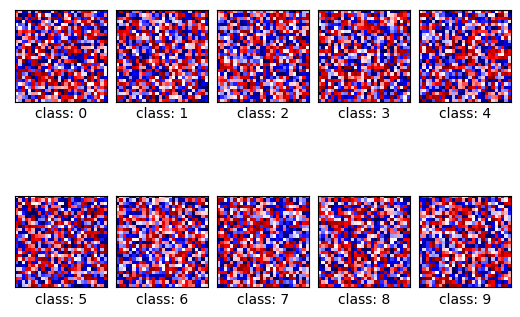

In [19]:
PlotParameters(model) #  this is our initialize softnmax model which initialy look all like noise

In [20]:
# Define the learning rate, optimizer, criterion and data loader

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

`Train Model`

In [21]:
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

`View Results`

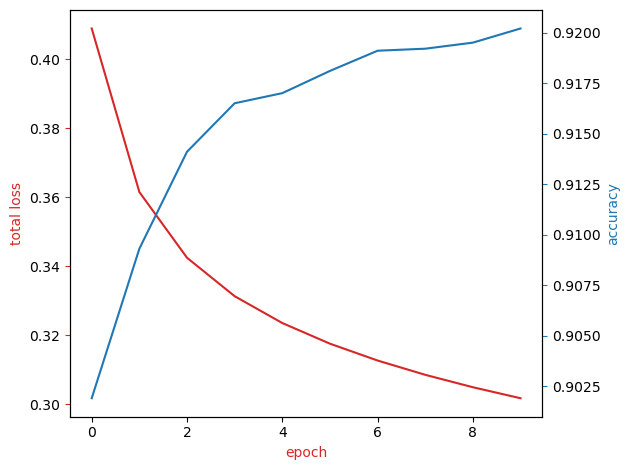

In [22]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

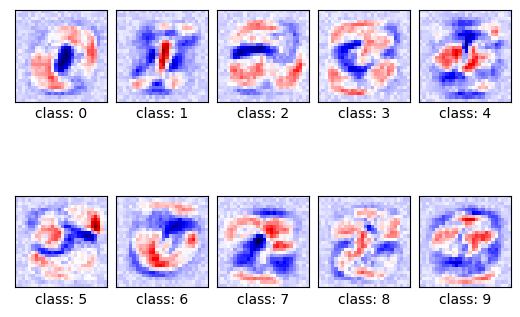

In [23]:
PlotParameters(model)

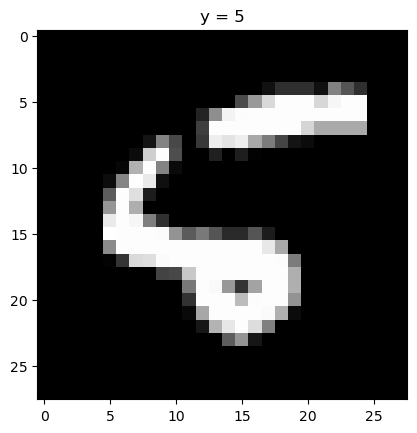

yhat: tensor([6])
probability of class  0.9901270866394043


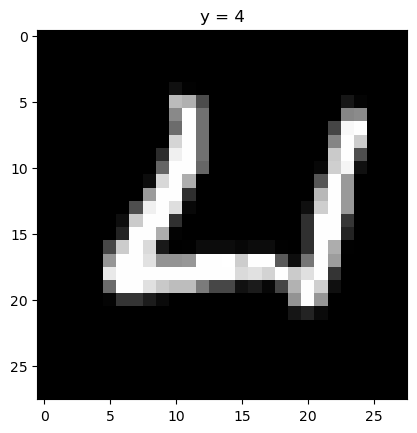

yhat: tensor([6])
probability of class  0.44947516918182373


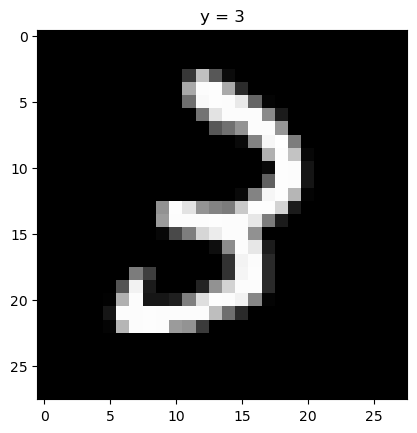

yhat: tensor([2])
probability of class  0.6811209917068481


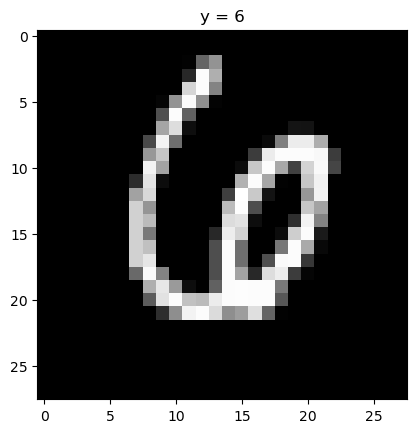

yhat: tensor([7])
probability of class  0.3364792466163635


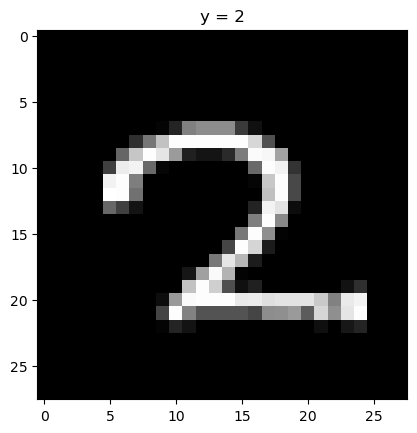

yhat: tensor([7])
probability of class  0.5436909198760986


In [24]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

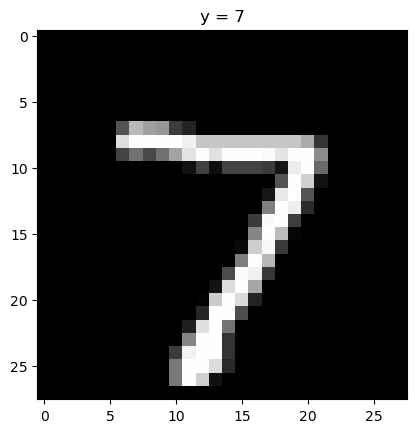

yhat: tensor([7])
probability of class  0.9966331124305725


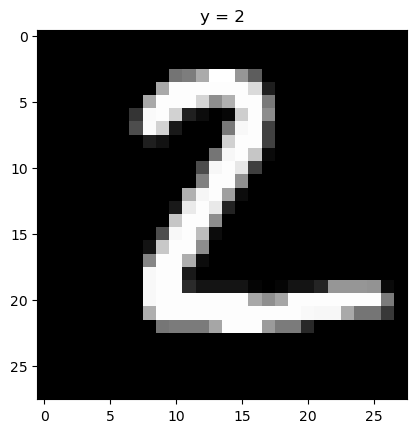

yhat: tensor([2])
probability of class  0.9463725090026855


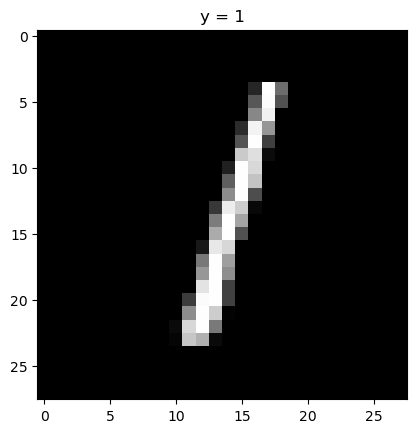

yhat: tensor([1])
probability of class  0.9754871129989624


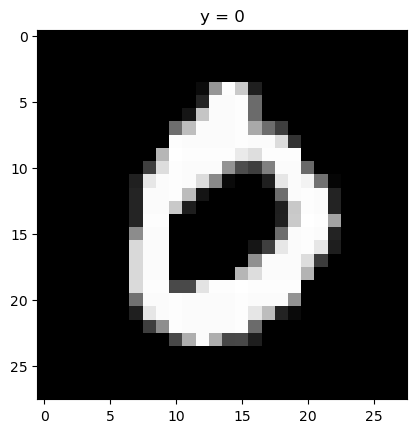

yhat: tensor([0])
probability of class  0.999599277973175


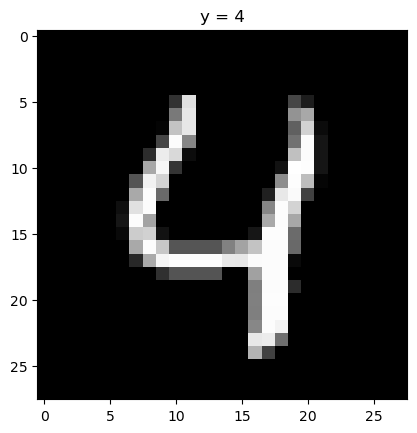

yhat: tensor([4])
probability of class  0.9481837153434753


In [25]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  